# **GALAXY MORPHOLOGY CLASSIFICATION USING DEEP LEARNING AND EXPLAINABLE AI**

## **1. Import Libraries and Initial Loading**

In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.9 MB/s eta 0:00:00


In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import tensorflow as tf
from google.colab import drive
import cv2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras import layers, models, optimizers, regularizers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
import random
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.models import load_model
import pickle

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to your Google Drive folder
zip_file_path_1 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1.zip'
zip_file_path_2 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1.zip'

# Folder where you want to extract the contents
extract_folder_1 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1'
extract_folder_2 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1'

# Unzipping the files
with zipfile.ZipFile(zip_file_path_1, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_1)

with zipfile.ZipFile(zip_file_path_2, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_2)

In [3]:

train_images_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1/images_training_rev1"
labels_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1/training_solutions_rev1.csv"



## **2. Preprocessing**

### **2.1 Labels**

In [4]:
# Load labels
labels_df = pd.read_csv(labels_path)


In [5]:
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [6]:
labels_df.shape

(61578, 38)

In [7]:
labels_df['image_path'] = labels_df['GalaxyID'].astype(str) + '.jpg'
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,image_path
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg


In [8]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GalaxyID    61578 non-null  int64  
 1   Class1.1    61578 non-null  float64
 2   Class1.2    61578 non-null  float64
 3   Class1.3    61578 non-null  float64
 4   Class2.1    61578 non-null  float64
 5   Class2.2    61578 non-null  float64
 6   Class3.1    61578 non-null  float64
 7   Class3.2    61578 non-null  float64
 8   Class4.1    61578 non-null  float64
 9   Class4.2    61578 non-null  float64
 10  Class5.1    61578 non-null  float64
 11  Class5.2    61578 non-null  float64
 12  Class5.3    61578 non-null  float64
 13  Class5.4    61578 non-null  float64
 14  Class6.1    61578 non-null  float64
 15  Class6.2    61578 non-null  float64
 16  Class7.1    61578 non-null  float64
 17  Class7.2    61578 non-null  float64
 18  Class7.3    61578 non-null  float64
 19  Class8.1    61578 non-nul

In [9]:
# missing values
missing_values = labels_df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)

if missing_values.sum() > 0:
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values in the dataset.")

Missing Values in Each Column:
GalaxyID      0
Class1.1      0
Class1.2      0
Class1.3      0
Class2.1      0
Class2.2      0
Class3.1      0
Class3.2      0
Class4.1      0
Class4.2      0
Class5.1      0
Class5.2      0
Class5.3      0
Class5.4      0
Class6.1      0
Class6.2      0
Class7.1      0
Class7.2      0
Class7.3      0
Class8.1      0
Class8.2      0
Class8.3      0
Class8.4      0
Class8.5      0
Class8.6      0
Class8.7      0
Class9.1      0
Class9.2      0
Class9.3      0
Class10.1     0
Class10.2     0
Class10.3     0
Class11.1     0
Class11.2     0
Class11.3     0
Class11.4     0
Class11.5     0
Class11.6     0
image_path    0
dtype: int64

No missing values in the dataset.


### **2.2 Images**

In [11]:
# number of images
train_image_count = len(os.listdir(train_images_path))

print(f"Number of images in training folder: {train_image_count}")

Number of images in training folder: 61578


In [12]:
# list of image file names in the training folder
training_images = set(os.listdir(train_images_path))

filtered_labels_df = labels_df[labels_df['image_path'].isin(training_images)].copy()

filtered_labels_df.reset_index(drop=True, inplace=True)

print(f"Number of images in training folder: {len(training_images)}")
print(f"Number of rows in filtered_labels_df: {filtered_labels_df.shape[0]}")
filtered_labels_df.head()

Number of images in training folder: 61578
Number of rows in filtered_labels_df: 61578


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,image_path
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg


In [13]:
def refine_classification(row):
    if row['Class1.2'] >= 0.9:
        return 'Spiral'
    elif row['Class1.1'] >= 0.9:
        return 'Elliptical'
    elif row['Class8.3'] > 0.5 or row['Class8.4'] > 0.5 or row['Class8.5'] > 0.5:
        return 'Irregular'
    else:
        return None

# Apply the refine_classification function to classify galaxies
filtered_labels_df['Galaxy_Type'] = filtered_labels_df.apply(refine_classification, axis=1)

# Filter out rows where Galaxy_Type is None (Uncertain galaxies)
filtered_galaxies_df = filtered_labels_df[filtered_labels_df['Galaxy_Type'].notna()]

# Check the distribution of galaxy types in the new DataFrame
print(filtered_galaxies_df['Galaxy_Type'].value_counts())


Galaxy_Type
Spiral        8776
Elliptical    2517
Irregular      465
Name: count, dtype: int64


In [14]:
# Create a new DataFrame for Spiral and Elliptical galaxies
spiral_elliptical_df = filtered_galaxies_df[filtered_galaxies_df['Galaxy_Type'].isin(['Spiral', 'Elliptical'])]

print(spiral_elliptical_df.head())

print(len(spiral_elliptical_df))

    GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
4     100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
8     100134  0.021834  0.976952  0.001214  0.021751  0.955201  0.313077   
19    100322  0.091987  0.908013  0.000000  0.816806  0.091207  0.000000   
22    100380  0.030000  0.970000  0.000000  0.043650  0.926350  0.463175   
35    100520  0.042430  0.957570  0.000000  0.579788  0.377782  0.103912   

    Class3.2  Class4.1  Class4.2  ...  Class10.2  Class10.3  Class11.1  \
4   0.000000  0.000000  0.000000  ...   0.000000   0.000000        0.0   
8   0.642124  0.546491  0.408711  ...   0.152044   0.187194        0.0   
19  0.091207  0.000000  0.091207  ...   0.000000   0.000000        0.0   
22  0.463175  0.926350  0.000000  ...   0.463175   0.000000        0.0   
35  0.273870  0.148593  0.229189  ...   0.000000   0.148593        0.0   

    Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  image_path  \
4    0.000000   0.000000 

In [15]:
# Create a new DataFrame with only the necessary columns
new_galaxy_df = spiral_elliptical_df[['GalaxyID','Galaxy_Type', 'image_path']]

# Preview the new DataFrame
print(new_galaxy_df.head())


    GalaxyID Galaxy_Type  image_path
4     100090  Elliptical  100090.jpg
8     100134      Spiral  100134.jpg
19    100322      Spiral  100322.jpg
22    100380      Spiral  100380.jpg
35    100520      Spiral  100520.jpg


In [16]:
# Save it to a CSV file if needed
new_galaxy_df.to_csv('spiral_elliptical.csv', index=False)

In [17]:
print(f'Total number of galaxies: {len(new_galaxy_df)}')


Total number of galaxies: 11293


In [19]:
# Apply Label Encoding to the class column in balanced_data
label_encoder = LabelEncoder()
new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])

# Check the mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

# Check the updated balanced_data DataFrame
print("Balanced DataFrame with Encoded Classes:")
print(new_galaxy_df.head())

Label Encoding Mapping:
{'Elliptical': 0, 'Spiral': 1}
Balanced DataFrame with Encoded Classes:
    GalaxyID Galaxy_Type  image_path  class_encoded
4     100090  Elliptical  100090.jpg              0
8     100134      Spiral  100134.jpg              1
19    100322      Spiral  100322.jpg              1
22    100380      Spiral  100380.jpg              1
35    100520      Spiral  100520.jpg              1


<ipython-input-19-95caf580d9f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])


## **3. EDA**

In [31]:
image_filename = new_galaxy_df.iloc[0]['image_path']  # Change index as needed
image_path = os.path.join(train_images_path, image_filename)

# Check image size
image = Image.open(image_path)
print(f"Image size for {image_filename}: {image.size}")

# Display a random image from the folder
random_image_filename = random.choice(new_galaxy_df['image_path'])  # Get a random image filename
random_image_path = os.path.join(train_images_path, random_image_filename)  # Construct the full path
random_image = Image.open(random_image_path)  # Open the image

plt.imshow(random_image)
plt.title(f"Galaxy Type: {new_galaxy_df.iloc[0]['Galaxy_Type']}, ID: {new_galaxy_df.iloc[0]['GalaxyID']}")
plt.axis('off')
plt.show()

Image size for 100090.jpg: (424, 424)


KeyError: 1430

## **4. Data Splitting**

In [20]:
# Create an empty list to store the selected images
limited_data = []

# Loop through each class and select up to 3000 images
for class_label in new_galaxy_df['class_encoded'].unique():
    # Filter images belonging to the class
    class_data = new_galaxy_df[new_galaxy_df['class_encoded'] == class_label]
    # If class has more than 3000 images, take the first 3000, otherwise take all
    class_data_limited = class_data.head(2500)
    limited_data.append(class_data_limited)

# Concatenate all selected images into a new DataFrame
limited_df = pd.concat(limited_data)


In [21]:
# Check the distribution of classes in the limited_df
class_distribution = limited_df['class_encoded'].value_counts()

# Print the class distribution
print("Class Distribution in Limited DataFrame:")
print(class_distribution)


Class Distribution in Limited DataFrame:
class_encoded
0    2500
1    2500
Name: count, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split

# Assuming you have your dataset in new_galaxy_df with a column 'class_encoded' representing the labels

# Split the dataset into training and validation sets using stratified sampling
X = limited_df['image_path']  # Features (image paths or any other feature)
y = limited_df['class_encoded']  # Labels (encoded galaxy types)

# Perform the split, ensuring stratification based on the 'class_encoded' column
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Combine the X_train and y_train into a new dataframe for the training set
train_df = pd.DataFrame({'image_path': X_train, 'class_encoded': y_train})

# Combine the X_val and y_val into a new dataframe for the validation set
val_df = pd.DataFrame({'image_path': X_val, 'class_encoded': y_val})

# Check the distribution of classes in the training and validation sets
print("Training Set Class Distribution:")
print(train_df['class_encoded'].value_counts())

print("\nValidation Set Class Distribution:")
print(val_df['class_encoded'].value_counts())


Training Set Class Distribution:
class_encoded
1    2000
0    2000
Name: count, dtype: int64

Validation Set Class Distribution:
class_encoded
0    500
1    500
Name: count, dtype: int64


## **5. Augmentation**

In [23]:
# Set up image generators for data augmentation and resizing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Reduce transformation range
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation

# Convert the class_encoded column to string type
train_df['class_encoded'] = train_df['class_encoded'].astype(str)
val_df['class_encoded'] = val_df['class_encoded'].astype(str)

# Train Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_images_path,
    x_col='image_path',
    y_col='class_encoded',  # Class labels as strings
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=64,
    class_mode='categorical'  # Since class labels are now strings
)

# Validation Generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=train_images_path,
    x_col='image_path',
    y_col='class_encoded',  # Class labels as strings
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=64,
    class_mode='categorical'
)

Found 4000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


## **6. Model 1: VGG16**

### **6.1 Implementation**

In [23]:
# Load VGG16 model (exclude the top layers for custom architecture)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze initial layers and only unfreeze the last few layers (e.g., the last 10)
for layer in base_model.layers[:-10]:  # Freeze layers up to the last 10
    layer.trainable = False

# Input layer
inputs = tf.keras.Input(shape=(224, 224, 3))

# Use the pre-trained base model for feature extraction
x = base_model(inputs)

# Global Average Pooling to reduce dimensions
x = GlobalAveragePooling2D()(x)

# Optionally add Dropout for regularization
x = Dropout(0.3)(x)

# Add Dense layers with ReLU activations
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)

# Output layer with 3 neurons for multi-class classification (Spiral, Elliptical, Irregular)
output = Dense(2, activation='softmax')(x)

# Create the final model
VGG16_model = Model(inputs=inputs, outputs=output)


58889256/58889256 [==============================] - 0s 0us/step


### **6.2 Compile**

In [24]:
# Compile the model
VGG16_model.compile(
    loss="categorical_crossentropy",  # For multi-class classification
    optimizer=Adam(learning_rate=1e-5),  # Small learning rate for fine-tuning
    metrics=["accuracy"]
)

# Check the model summary
VGG16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                             

In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### **6.3 Training**

In [26]:
# Train the model using the data generators
history = VGG16_model.fit(
    train_generator,  # Replace with your actual training data generator
    epochs=15,
    validation_data=val_generator  # Replace with your actual validation data generator
)

Epoch 1/15
63/63 [==============================] - 1247s 20s/step - loss: 0.5626 - accuracy: 0.7190 - val_loss: 0.2812 - val_accuracy: 0.8860
Epoch 2/15
63/63 [==============================] - 249s 4s/step - loss: 0.1489 - accuracy: 0.9455 - val_loss: 0.1026 - val_accuracy: 0.9720
Epoch 3/15
63/63 [==============================] - 249s 4s/step - loss: 0.0816 - accuracy: 0.9722 - val_loss: 0.0944 - val_accuracy: 0.9680
Epoch 4/15
63/63 [==============================] - 249s 4s/step - loss: 0.0656 - accuracy: 0.9768 - val_loss: 0.0713 - val_accuracy: 0.9770
Epoch 5/15
63/63 [==============================] - 249s 4s/step - loss: 0.0438 - accuracy: 0.9850 - val_loss: 0.0544 - val_accuracy: 0.9800
Epoch 6/15
63/63 [==============================] - 249s 4s/step - loss: 0.0533 - accuracy: 0.9797 - val_loss: 0.0480 - val_accuracy: 0.9820
Epoch 7/15
63/63 [==============================] - 250s 4s/step - loss: 0.0336 - accuracy: 0.9887 - val_loss: 0.0732 - val_accuracy: 0.9790
Epoch 8/15


In [27]:
# Save the trained model to a file
VGG16_model.save('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/VGG16_modelv2.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **6.4 Validation**

In [26]:
# Load the VGG16 model
VGG16_model = load_model('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/VGG16_modelv2.h5')

In [27]:
# Evaluate the model on the test data
test_loss, test_accuracy = VGG16_model.evaluate(val_generator)  # Replace with your actual test data generator
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


16/16 [==============================] - 292s 19s/step - loss: 0.0487 - accuracy: 0.9870
Test Loss: 0.04868735000491142
Test Accuracy: 0.9869999885559082


In [30]:
# If history was saved as a pickle file
with open('history.pickle', 'rb') as file:
    history = pickle.load(file)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'history.pickle'

### **6.5 Prediction**

1/1 [==============================] - 0s 73ms/step
Image: 227460.jpg
Predicted Class: Spiral


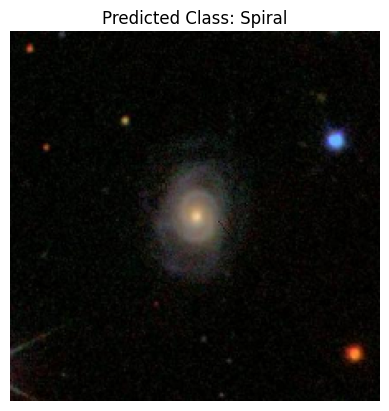

1/1 [==============================] - 0s 72ms/step
Image: 646254.jpg
Predicted Class: Elliptical


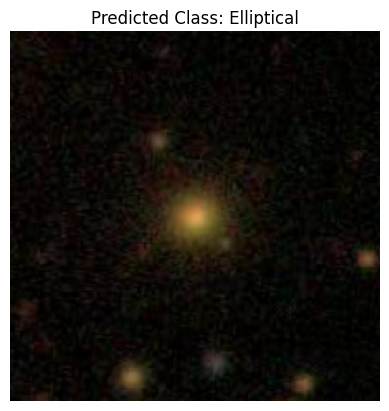

1/1 [==============================] - 0s 74ms/step
Image: 255771.jpg
Predicted Class: Spiral


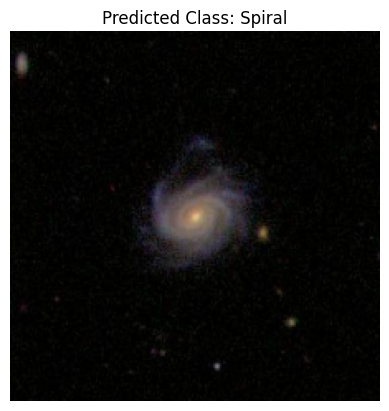

1/1 [==============================] - 0s 73ms/step
Image: 200389.jpg
Predicted Class: Spiral


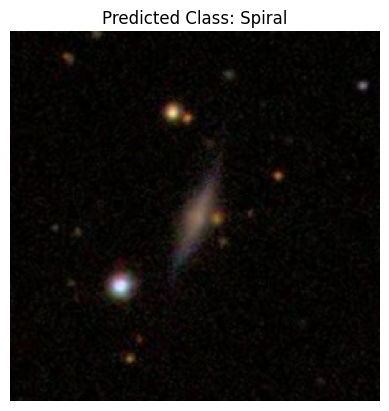

1/1 [==============================] - 0s 81ms/step
Image: 269383.jpg
Predicted Class: Elliptical


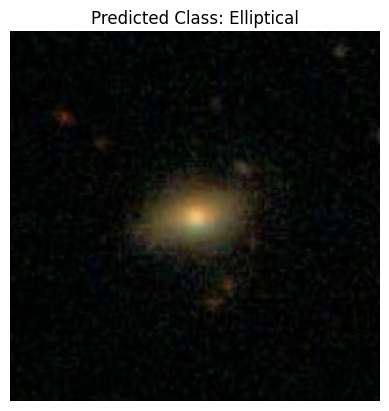

In [41]:
# Create a mapping of class indices to human-readable labels
class_labels = {0: 'Elliptical', 1: 'Spiral'}

# Load random images from the validation set
random_images = random.sample(list(val_df['image_path']), 5)  # Ensure val_df['image_path'] exists

for image_filename in random_images:
    image_path = os.path.join(train_images_path, image_filename)  # Replace with correct path

    # Load and preprocess the image
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0) / 255.0

    # Predict using the VGG16 model
    prediction = VGG16_model.predict(image_array)
    predicted_class = np.argmax(prediction)

    # Map predicted class to human-readable label
    predicted_label = class_labels[predicted_class]

    # Display prediction
    print(f"Image: {image_filename}")
    print(f"Predicted Class: {predicted_label}")

    # Display the image with prediction
    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_label}")
    plt.axis('off')
    plt.show()

### **6.6 Evaluation**

16/16 [==============================] - 17s 1s/step


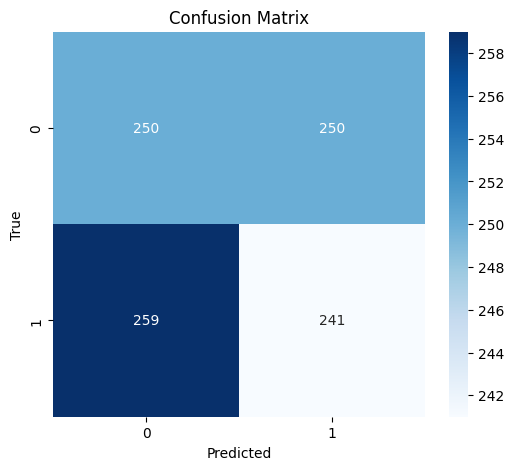

In [42]:
# Predict on the validation/test set
y_true = val_generator.classes
y_pred = VGG16_model.predict(val_generator)

# Convert predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Get true labels (y_true) and predicted labels (y_pred_classes)
y_true = val_generator.classes
y_pred_classes = np.argmax(VGG16_model.predict(val_generator), axis=1)

# Generate and display the classification report
class_labels = list(val_generator.class_indices.keys())  # Class names
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

16/16 [==============================] - 18s 1s/step
              precision    recall  f1-score   support

           0       0.49      0.50      0.50       500
           1       0.49      0.48      0.49       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



## **7. Model 2: RESNE50:**

### **7.1 Initialisation**

In [33]:
# Load ResNet50 model (exclude the top layers for custom architecture)
base_model_RESNET50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze initial layers and only unfreeze the last few layers (e.g., the last 10)
for layer in base_model_RESNET50.layers[:-10]:  # Freeze layers up to the last 10
    layer.trainable = False

# Input layer
inputs_RESNET50 = tf.keras.Input(shape=(224, 224, 3))

# Use the pre-trained ResNet50 base model for feature extraction
x_RESNET50 = base_model_RESNET50(inputs_RESNET50)

# Global Average Pooling to reduce dimensions
x_RESNET50 = GlobalAveragePooling2D()(x_RESNET50)

# Optionally add Dropout for regularization
x_RESNET50 = Dropout(0.3)(x_RESNET50)

# Add Dense layers with ReLU activations
x_RESNET50= Dense(512, activation='relu')(x_RESNET50)
x_RESNET50 = Dense(256, activation='relu')(x_RESNET50)

# Output layer with 2 neurons for binary classification (Spiral, Elliptical)
output_RESNET50 = Dense(2, activation='softmax')(x_RESNET50)

# Create the final ResNet50 model
RESNET50_model = Model(inputs=inputs_RESNET50, outputs=output_RESNET50)


### **7.2 Compile**

In [34]:
# Compile the model
RESNET50_model.compile(
    loss="categorical_crossentropy",  # For multi-class classification
    optimizer=Adam(learning_rate=1e-5),  # Small learning rate for fine-tuning
    metrics=["accuracy"]
)

# Check the model summary
RESNET50_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                           

In [35]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


### **7.3 Training**

In [36]:
# Train the model using the data generators
history_RESNET50 = RESNET50_model.fit(
    train_generator,  # Replace with your actual training data generator
    epochs=15,
    validation_data=val_generator  # Replace with your actual validation data generator
)

Epoch 1/15
63/63 [==============================] - 109s 2s/step - loss: 0.7005 - accuracy: 0.5235 - val_loss: 0.7023 - val_accuracy: 0.5000
Epoch 2/15
63/63 [==============================] - 104s 2s/step - loss: 0.6677 - accuracy: 0.5842 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 3/15
63/63 [==============================] - 105s 2s/step - loss: 0.6068 - accuracy: 0.6880 - val_loss: 0.7027 - val_accuracy: 0.5000
Epoch 4/15
63/63 [==============================] - 105s 2s/step - loss: 0.5353 - accuracy: 0.7465 - val_loss: 0.6753 - val_accuracy: 0.7080
Epoch 5/15
63/63 [==============================] - 104s 2s/step - loss: 0.4804 - accuracy: 0.7722 - val_loss: 0.6856 - val_accuracy: 0.5090
Epoch 6/15
63/63 [==============================] - 105s 2s/step - loss: 0.4382 - accuracy: 0.7997 - val_loss: 0.6961 - val_accuracy: 0.5260
Epoch 7/15
63/63 [==============================] - 104s 2s/step - loss: 0.4054 - accuracy: 0.8205 - val_loss: 0.6578 - val_accuracy: 0.5730
Epoch 8/15
63

In [37]:
# Save the trained model to a file
RESNET50_model.save('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/RESNETV2.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **7.4 Validation**

In [35]:
# Load the ResNet50 model
ResNet50_model = load_model('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/RESNETV2.h5')

In [45]:
# Evaluate the model on the test data
test_loss, test_accuracy = ResNet50_model.evaluate(val_generator)  # Replace with your actual test data generator
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


16/16 [==============================] - 19s 1s/step - loss: 0.3537 - accuracy: 0.8510
Test Loss: 0.3536619544029236
Test Accuracy: 0.8510000109672546


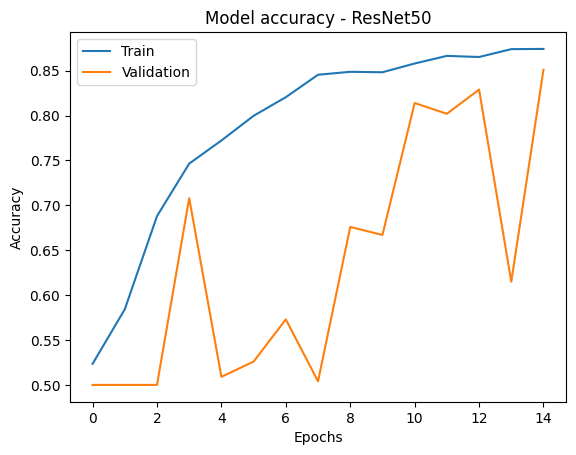

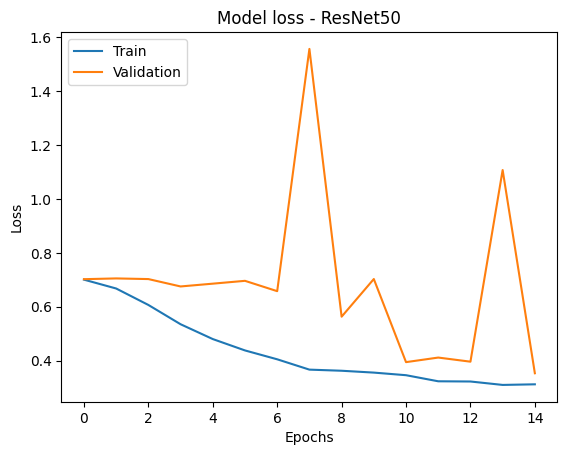

In [41]:
# Plot training & validation accuracy values
plt.plot(history_RESNET50.history['accuracy'])
plt.plot(history_RESNET50.history['val_accuracy'])
plt.title('Model accuracy - ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_RESNET50.history['loss'])
plt.plot(history_RESNET50.history['val_loss'])
plt.title('Model loss - ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **7.5 Prediction**

### **7.6 Evaluation**

## **8. Model 3: Custom_CNN**

### **8.1 Initialisation**

In [42]:

# Define a simple Custom CNN model
def create_CUSTOM_CNN():
    model = models.Sequential()

    # Convolutional layers with ReLU activation
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))

    # Output layer with 2 neurons for binary classification (Spiral, Elliptical)
    model.add(layers.Dense(2, activation='softmax'))

    return model

# Create the Custom CNN model
CUSTOM_CNN_model = create_CUSTOM_CNN()

### **8.2 Compile**

In [43]:
# Compile the model
CUSTOM_CNN_model.compile(
    loss="categorical_crossentropy",  # For multi-class classification
    optimizer=Adam(learning_rate=1e-5),  # Small learning rate for fine-tuning
    metrics=["accuracy"]
)

# Check the model summary
CUSTOM_CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [44]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### **8.3 Training**

In [45]:
# Train the model using the data generators
history_CUSTOM_CNN = CUSTOM_CNN_model.fit(
    train_generator,  # Replace with your actual training data generator
    epochs=15,
    validation_data=val_generator  # Replace with your actual validation data generator
)

Epoch 1/15
63/63 [==============================] - 79s 1s/step - loss: 0.6755 - accuracy: 0.6660 - val_loss: 0.6484 - val_accuracy: 0.7520
Epoch 2/15
63/63 [==============================] - 78s 1s/step - loss: 0.6060 - accuracy: 0.7577 - val_loss: 0.5548 - val_accuracy: 0.7830
Epoch 3/15
63/63 [==============================] - 78s 1s/step - loss: 0.5089 - accuracy: 0.8033 - val_loss: 0.4847 - val_accuracy: 0.7900
Epoch 4/15
63/63 [==============================] - 78s 1s/step - loss: 0.4442 - accuracy: 0.8295 - val_loss: 0.4643 - val_accuracy: 0.7890
Epoch 5/15
63/63 [==============================] - 77s 1s/step - loss: 0.4006 - accuracy: 0.8428 - val_loss: 0.4448 - val_accuracy: 0.8080
Epoch 6/15
63/63 [==============================] - 76s 1s/step - loss: 0.3748 - accuracy: 0.8545 - val_loss: 0.4031 - val_accuracy: 0.8280
Epoch 7/15
63/63 [==============================] - 78s 1s/step - loss: 0.3503 - accuracy: 0.8675 - val_loss: 0.4124 - val_accuracy: 0.8200
Epoch 8/15
63/63 [==

In [46]:
# Save the trained model to a file
CUSTOM_CNN_model.save('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/CUSTOM_CNNV2.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **8.4 Validation**

In [ ]:
# Load the Custom CNN model
CUSTOM_CNN_model = load_model('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/CUSTOM_CNNV2.h5')

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = CUSTOM_CNN_mo322.
del.evaluate(val_generator)  # Replace with your actual test data generator
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [ ]:
# Plot training & validation accuracy values
plt.plot(history_CUSTOM_CNN.history['accuracy'])
plt.plot(history_CUSTOM_CNN.history['val_accuracy'])
plt.title('Model accuracy - CUSTOM CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_CUSTOM_CNN.history['loss'])
plt.plot(history_CUSTOM_CNN.history['val_loss'])
plt.title('Model loss - CUSTOM CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Load Saved Models**

In [27]:
from tensorflow.keras.models import load_model

# Load the VGG16 model
VGG16_model = load_model('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/VGG16_modelv2.h5')

# Load the ResNet50 model
ResNet50_model = load_model('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/RESNETV2.h5')

# Load the Custom CNN model
CUSTOM_CNN_model = load_model('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/CUSTOM_CNNV2.h5')